In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers.core import Dense
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time
from sklearn import preprocessing
import glob
from google.colab import drive
seed = 7
np.random.seed(seed)
drive.mount("/content/drive/")
path = "/content/drive/My Drive/Colab Notebooks/NNDL/HW2/"
plt.style.use('seaborn-darkgrid')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


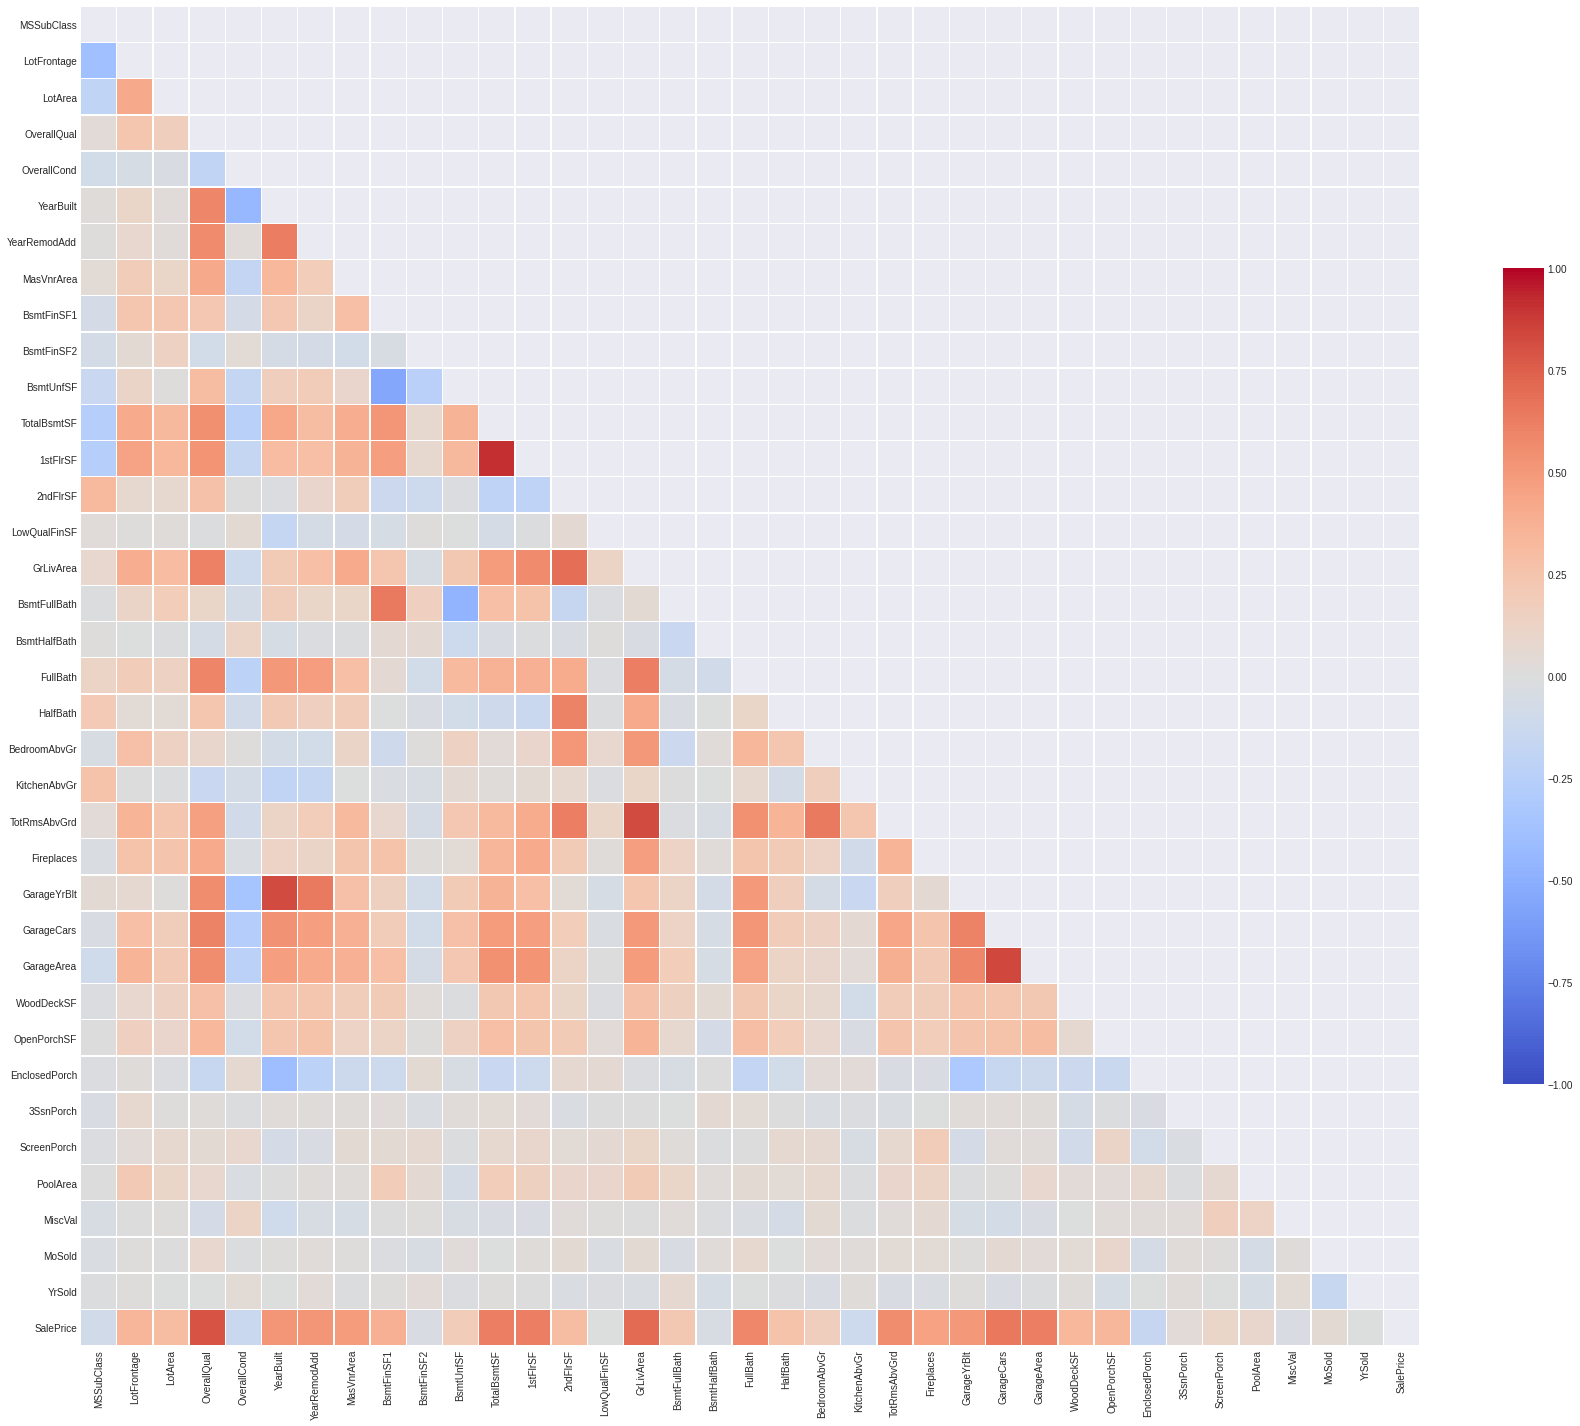

In [65]:
house_df = df = pd.read_csv(path + "house prices.csv").drop("Id",axis=1)
house_df = house_df[(house_df.count()>1000).loc[lambda x: x==True].index]
house_df = house_df[~(house_df.isna().any(axis=1))]

house_y = house_df.SalePrice
house_X = house_df.drop("SalePrice",axis=1)
le = preprocessing.LabelEncoder()
obj_df = house_X.select_dtypes(include=['object']).copy()
for column in obj_df.columns:
  house_X[column] =le.fit_transform(house_X[column].values)

f, ax = plt.subplots(figsize=(30, 30))
corr = house_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=1,vmin =-1,square=True, linewidths=.4,cbar_kws={"shrink": .5})

In [66]:
sonar_df = pd.read_csv(path + "sonar.csv",header=None)

sonar_X = sonar_df.iloc[:,0:60].values.astype(float)
sonar_y = sonar_df.iloc[:,60].values

sonar_X = StandardScaler().fit_transform(sonar_X)

le = preprocessing.LabelEncoder()
sonar_y =le.fit_transform(sonar_y)

Text(0.5, 1.0, 'Feature Importance with Decision Tree Regressor')

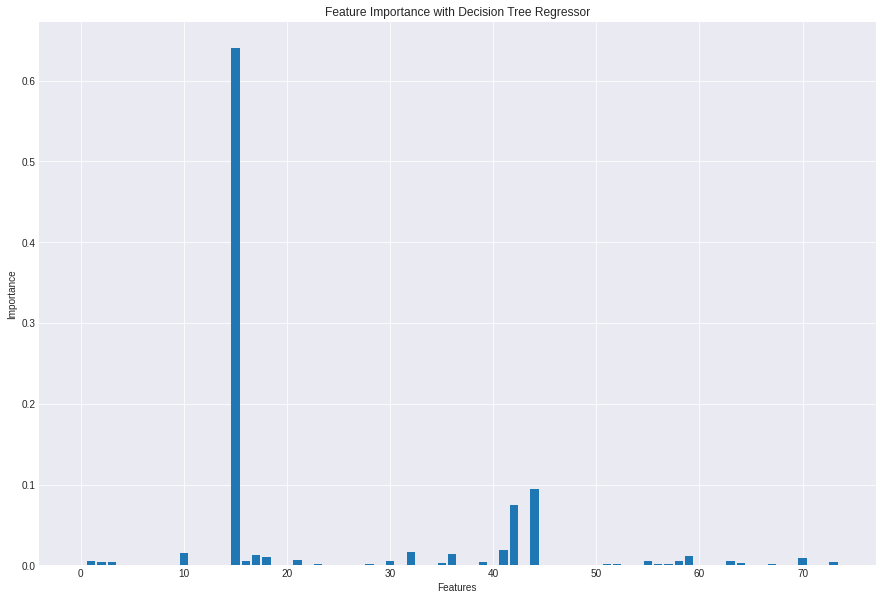

In [84]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=0)
DTR.fit(house_X,house_y)
DTR.feature_importances_
plt.figure(figsize=(15,10))
plt.bar(range(74),DTR.feature_importances_)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance with Decision Tree Regressor")

Text(0.5, 1.0, 'Feature Importance with Linear Regressor')

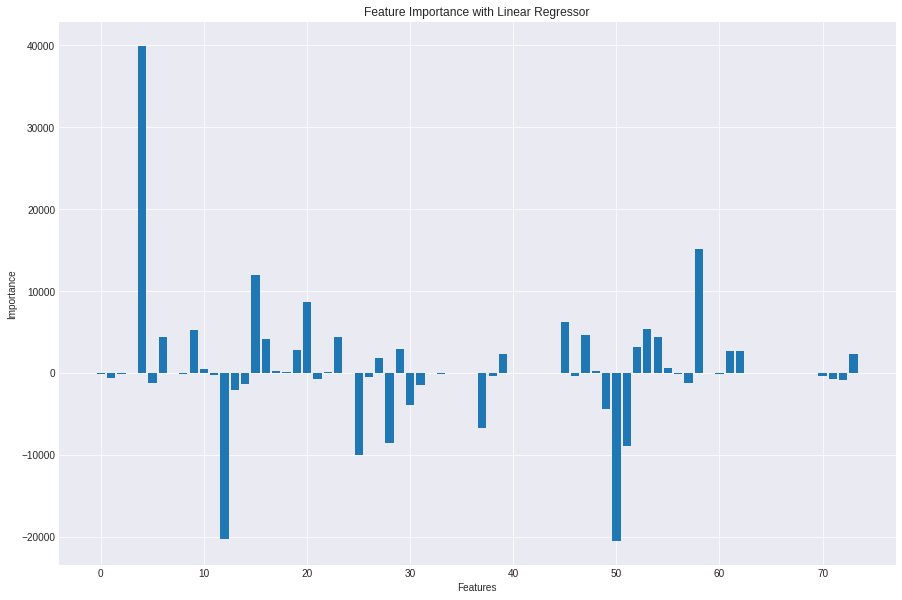

In [83]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
LR = LinearRegression()
LR.fit(house_X,house_y)
plt.figure(figsize=(15,10))
plt.bar(range(74),LR.coef_)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance with Linear Regressor")

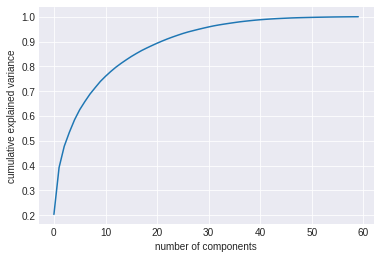

In [ ]:
pca = PCA().fit(sonar_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


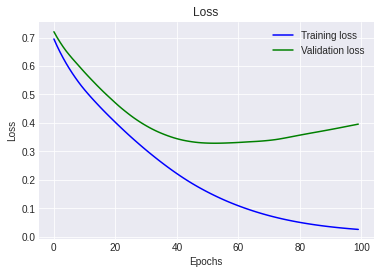

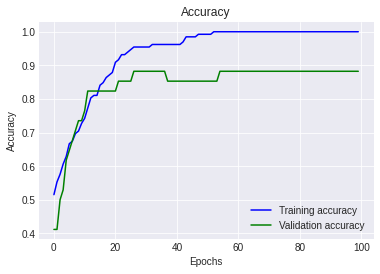

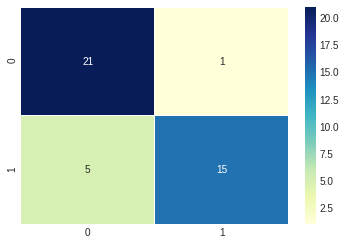

Accuracy: 85.71%
train Time:  4.521634340286255
Cross Validation Accuracy: 84.30% ± 7.79%


In [ ]:
def train_model():
  model = Sequential()
  model.add(Dense(60, activation='relu', input_shape=(60,)))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy' , "mse"])
  return model

X_train, X_test, y_train, y_test = train_test_split(sonar_X, sonar_y, test_size=0.2, random_state=42,shuffle=True, stratify=sonar_y)

epochs=100
clf_20 = KerasClassifier(build_fn=train_model, epochs=epochs)
start = time.time()
hist_20 = clf_20.fit(X_train,y_train,validation_split=0.2,batch_size=166,verbose=0)
end = time.time()
train_time = end - start

plt.figure(1)
plt.plot(range(epochs), hist_20.history["loss"], 'b', label='Training loss')
plt.plot(range(epochs), hist_20.history["val_loss"], 'g', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
plt.plot(range(epochs), hist_20.history["accuracy"], 'b', label='Training accuracy')
plt.plot(range(epochs), hist_20.history["val_accuracy"], 'g', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

y_pred_20 = clf_20.predict(X_test)
acc_20 = accuracy_score(y_test, y_pred_20)

plt.figure(3)
sns.heatmap(confusion_matrix(y_test, y_pred_20), annot=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.show()

print("Accuracy: %.2f%%" % (acc_20*100))
print("train Time: ",train_time)
results = cross_val_score( KerasClassifier(build_fn=train_model, epochs=150, batch_size=166, verbose=0), X_train, y_train, cv=kfold)
print("Cross Validation Accuracy: %.2f%% ± %.2f%%" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


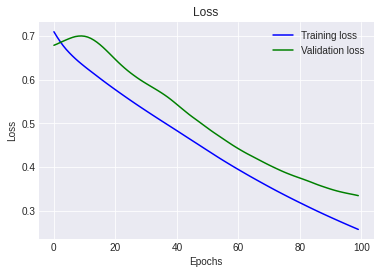

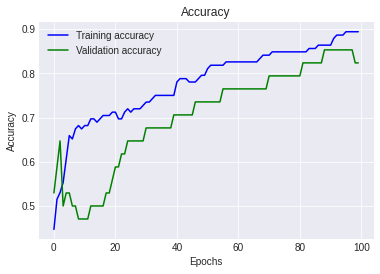

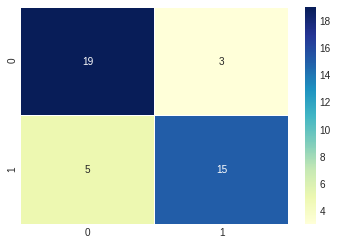

Accuracy: 80.95%
enode time:  5.9272620677948
train Time:  4.513418674468994
Cross Validation Accuracy: 77.02% ± 8.07%


In [ ]:
reduced_dim = 30

def create_autoencoder():
    input_vector = Input(shape=(60,))
    encoded = Dense(90, activation='relu')(input_vector)
    encoded = Dense(reduced_dim, activation='relu')(encoded)
    decoded = Dense(90, activation='relu')(encoded)
    decoded = Dense(60, activation='relu')(decoded)
    autoencoder = tf.keras.Model(input_vector, decoded)
    autoencoder.compile(optimizer='adadelta', loss='mse')
    return autoencoder

def train_model():
  model = Sequential()
  model.add(Dense(60, activation='relu', input_shape=(reduced_dim,)))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy' , "mse"])
  return model

start = time.time()
autoencoder = create_autoencoder()
hist = autoencoder.fit(sonar_X,sonar_y,epochs=150,batch_size=166,shuffle=True,validation_split=0.2,verbose=0)
end = time.time()
encode_time = end - start
encoder = tf.keras.Model(autoencoder.input, autoencoder.layers[2].output)
encoded_X = pd.DataFrame(encoder.predict(sonar_X))

X_train, X_test, y_train, y_test = train_test_split(encoded_X, sonar_y, test_size=0.2, random_state=42,shuffle=True, stratify=sonar_y)

epochs=100
clf_20 = KerasClassifier(build_fn=train_model, epochs=epochs)
start = time.time()
hist_20 = clf_20.fit(X_train,y_train,validation_split=0.2,batch_size=166,verbose=0)
end = time.time()
train_time = end - start

plt.figure(1)
plt.plot(range(epochs), hist_20.history["loss"], 'b', label='Training loss')
plt.plot(range(epochs), hist_20.history["val_loss"], 'g', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
plt.plot(range(epochs), hist_20.history["accuracy"], 'b', label='Training accuracy')
plt.plot(range(epochs), hist_20.history["val_accuracy"], 'g', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

y_pred_20 = clf_20.predict(X_test)
acc_20 = accuracy_score(y_test, y_pred_20)

plt.figure(3)
sns.heatmap(confusion_matrix(y_test, y_pred_20), annot=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.show()

print("Accuracy: %.2f%%" % (acc_20*100))
print("enode time: ",encode_time)
print("train Time: ",train_time)
results = cross_val_score( KerasClassifier(build_fn=train_model, epochs=150, batch_size=166, verbose=0), X_train, y_train, cv=kfold)
print("Cross Validation Accuracy: %.2f%% ± %.2f%%" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


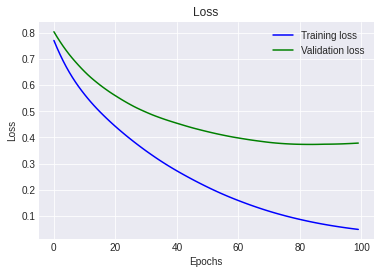

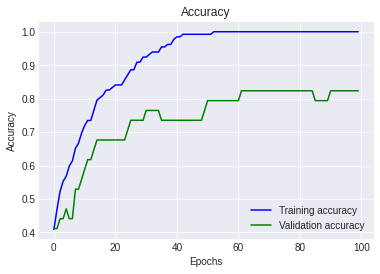

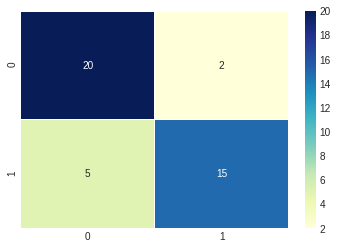

Accuracy: 83.33%
enode time:  0.005240917205810547
train Time:  4.36942458152771
Cross Validation Accuracy: 83.20% ± 5.70%


In [ ]:
reduced_dim = 30

def train_model():
  model = Sequential()
  model.add(Dense(60, activation='relu', input_shape=(reduced_dim,)))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy' , "mse"])
  return model

start = time.time()
pca = PCA(n_components=reduced_dim)
PCA_X = pca.fit_transform(sonar_X)
end = time.time()
pca_time = end - start

X_train, X_test, y_train, y_test = train_test_split(PCA_X, sonar_y, test_size=0.2, random_state=42,shuffle=True, stratify=sonar_y)

epochs=100
clf_20 = KerasClassifier(build_fn=train_model, epochs=epochs)
start = time.time()
hist_20 = clf_20.fit(X_train,y_train,validation_split=0.2,batch_size=166,verbose=0)
end = time.time()
train_time = end - start
plt.figure(1)
plt.plot(range(epochs), hist_20.history["loss"], 'b', label='Training loss')
plt.plot(range(epochs), hist_20.history["val_loss"], 'g', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
plt.plot(range(epochs), hist_20.history["accuracy"], 'b', label='Training accuracy')
plt.plot(range(epochs), hist_20.history["val_accuracy"], 'g', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
y_pred_20 = clf_20.predict(X_test)
acc_20 = accuracy_score(y_test, y_pred_20)
plt.figure(3)
sns.heatmap(confusion_matrix(y_test, y_pred_20), annot=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.show()
print("Accuracy: %.2f%%" % (acc_20*100))
print("enode time: ",pca_time)
print("train Time: ",train_time)
results = cross_val_score( KerasClassifier(build_fn=train_model, epochs=150, batch_size=166, verbose=0), X_train, y_train, cv=kfold)
print("Cross Validation Accuracy: %.2f%% ± %.2f%%" % (results.mean()*100, results.std()*100))